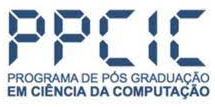

**CEFET-RJ - PPCIC**

Etapa 1 - TCE - Análise Exporatória do Dataset de Notas de Empenho

**Prof**. Eduardo Bezerra

### 1. Pré-tratamento do dataset de Notas de Empenho

#### 1.1 Carregando as bibliotecas

In [1]:
#!pip install pandas_profiling
#!pip install pyxlsb
#!pip install openpyxl
#!pip install xlrd
#!pip install networkx
#!pip install nxviz
#!pip install gspread
#!pip install pydot
#!pip install wheel
#!pip install pandas-profiling[notebook]
#!pip install -U ydata-profiling
#!pip install https://github.com/ydataai/ydata-profiling/archive/master.zip
#!pip install pycpfcnpj

In [2]:
import csv
#from google.colab import data_table
import itertools
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.backends.backend_pdf import PdfPages
import math
from math import sqrt
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
pd.reset_option('display.max_columns')
from scipy import spatial
from scipy import stats
import seaborn as sns
import unicodedata
import string as str
import sys
from pyxlsb import open_workbook as open_xlsb
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
import gspread
from nxviz import CircosPlot
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from typing import List
from ipywidgets import HTML, Button, widgets
from ydata_profiling import ProfileReport
from IPython import display
import time
from pycpfcnpj import cpfcnpj

#### 1.2.Acessando o dataset de Nota de Empenho fornecidos pelo TCE-RJ

In [3]:
#Verificando o momento inicial do processamento
time_new = time.time()
timeline = []

In [4]:
#Criando o dataset a partir do arquivo rpt fornecido pelo TCE-RJ
#Fazendo o download do dataset
url = 'https://drive.google.com/file/d/1DeGWehzJ4JxnsEZ_TGnCGu6VeSXhx1DI/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
header_list = ['IdEmpenho', 'Ano', 'Vlr_AnulacaoEmpenho', 'CdFonteTCE', 'CdFonteUG', 'CNPJRaiz', 'CPFCNPJCredorQtNrs', 'CPFCNPJCredor', 'Credor', 'DtEmpenho', 'DEFonteTCE', 'DEFonteUG', 'DEPrograma', 'DEProjAtiv', 'DtAnomes', 'Elemento', 'ElemDespesaTCE', 'ElemDespesaUG', 'Ente', 'Esfera', 'Funcao', 'Historico', 'IdContrato', 'IdFonte', 'IdFuncao', 'Id_Orgao', 'IdPrograma', 'IdSubFuncao', 'IdUnid', 'IdOrgao', 'IdUnidOrcamentaria', 'NrFonte', 'NrFonteUG', 'NrLicitacao', 'NrProjAtiv', 'NrEmpenho', 'ProgTrab', 'ProgTrabRed', 'ProjAtiv', 'SubFuncao', 'Tp_Empenho', 'Unidade', 'Vlr_Empenho', 'Vlr_Anul_Liquidacao', 'Vlr_Liquidacao', 'Vlr_Pagto', 'Vlr_Retencao', 'Vlr_SubEmpenho', 'Vlr_Empenhado', 'Vlr_Liquidado', 'Vlr_Pago']
cols = [28, 12, 23, 14, 13, 10, 27, 21, 101, 28, 131, 31, 51, 256, 12, 61, 181, 101, 31, 7, 51, 256, 31, 61, 61, 14, 12, 61, 12, 61, 91, 31, 31, 31, 13, 15, 51, 31, 181, 101, 21, 101, 23, 26, 23, 23, 23, 23, 23, 23, 22]
tce = pd.read_fwf(path, skiprows=2, names=header_list, widths=cols)
#tce = pd.read_fwf('empenhos_ivson.rpt', skiprows=2, names=header_list, widths=cols)

#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'1.Carga do dataset': time_new - time_old})

tce

HTTPError: HTTP Error 404: Not Found

In [ ]:
#eliminando a última linha vez que é um totalizador 
tce1 = tce.drop(tce.index[-1])
x

In [ ]:
#analisando os dados e atribuindo a melhor formatação automática dada pelo Pandas
tce2 = tce1.convert_dtypes()

#convertendo a formatação da DtEmpenho
tce2.DtEmpenho = pd.to_datetime(tce2.DtEmpenho, format="%Y-%m-%d")

#verificando o resultado de tipos
tce2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863231 entries, 0 to 1863230
Data columns (total 51 columns):
 #   Column               Dtype         
---  ------               -----         
 0   IdEmpenho            string        
 1   Ano                  Int64         
 2   Vlr_AnulacaoEmpenho  string        
 3   CdFonteTCE           Int64         
 4   CdFonteUG            Int64         
 5   CNPJRaiz             string        
 6   CPFCNPJCredorQtNrs   Int64         
 7   CPFCNPJCredor        string        
 8   Credor               string        
 9   DtEmpenho            datetime64[ns]
 10  DEFonteTCE           string        
 11  DEFonteUG            string        
 12  DEPrograma           string        
 13  DEProjAtiv           string        
 14  DtAnomes             Int64         
 15  Elemento             Float64       
 16  ElemDespesaTCE       string        
 17  ElemDespesaUG        string        
 18  Ente                 string        
 19  Esfera               

In [ ]:
#observando os dados para um registro
tce2.iloc[-1]

IdEmpenho                                    202100581043500010000000002
Ano                                                                 2021
Vlr_AnulacaoEmpenho                                                    0
CdFonteTCE                                                             0
CdFonteUG                                                              2
CNPJRaiz                                                        60746948
CPFCNPJCredorQtNrs                                                    14
CPFCNPJCredor                                             60746948228806
Credor                                                     BRADESCO S.A.
DtEmpenho                                            2021-06-30 00:00:00
DEFonteTCE                                           RECURSOS ORDINÁRIOS
DEFonteUG                                                         FURPGM
DEPrograma                                          APOIO ADMINISTRATIVO
DEProjAtiv             MANUTENÇÃO DO FUNDO DE REAPA

#### 1.3. Analisando os valores ausentes do dataset

In [ ]:
null_class = pd.DataFrame(columns=['atribute', 'ausentes', 'perc'])
tot = tce2.shape[0]
for col in tce2:
    value = tce2[col].isnull().sum()
    if value > 0:
        perc = (value / tot) * 100
        dict = {'atribute': col, 'ausentes': value, 'perc': perc}
        null_class = null_class.append(dict, ignore_index=True, sort=False)
#excetuar eventuais colunas com valores
null_class = null_class[(~null_class['atribute'].str.startswith('Vlr'))]

#classificando a acao proposta
null_class.loc[(null_class['perc'] > stats.trim_mean(null_class['perc'], 0.30)) & (null_class['perc'] > 75), 'class'] = 'High' #maior que 75%, eliminar
null_class.loc[(null_class['perc'] > stats.trim_mean(null_class['perc'], 0.30)) & (null_class['perc'] < 75), 'class'] = 'Keep' #menor que 75%, eliminar
null_class.loc[null_class['class'].isnull(), 'class'] = 'Low' #menor que a média aparada

#listando as colunas conforme a classe
null_low = null_class[null_class['class'] == 'Low'].atribute.value_counts().keys().to_list()
print('Atributos com ausência menor que a média aparada:', null_low)
null_keep = null_class[null_class['class'] == 'Keep'].atribute.value_counts().keys().to_list()
print('Atributos com ausência menor que 75 e maior que a média aparada:', null_keep)
null_high = null_class[null_class['class'] == 'High'].atribute.value_counts().keys().to_list()
print('Atributos a serem eliminados (com ausência maior que a média aparada e maior que 75):', null_high)
c_missed = null_keep
print('O tratamento implicará na eliminação de', len(null_high), 'coluna(s) e até', null_class[null_class['class'] == 'Low'].ausentes.sum(), 'registros.')

null_class

Atributos com ausência menor que a média aparada: ['CdFonteTCE', 'DEFonteTCE', 'ElemDespesaTCE', 'Historico', 'NrFonte', 'SubFuncao', 'Unidade']
Atributos com ausência menor que 75 e maior que a média aparada: ['IdEmpenho', 'CdFonteUG', 'DEFonteUG', 'DEProjAtiv', 'ElemDespesaUG', 'Id_Orgao', 'NrFonteUG', 'NrLicitacao', 'NrProjAtiv', 'ProgTrabRed']
Atributos a serem eliminados (com ausência maior que a média aparada e maior que 75): ['IdUnidOrcamentaria']
O tratamento implicará na eliminação de 1 coluna(s) e até 26837 registros.


,atribute,ausentes,perc,class
0,IdEmpenho,377871,20.28,Keep
1,CdFonteTCE,1144,0.06,Low
2,CdFonteUG,377871,20.28,Keep
3,DEFonteTCE,1144,0.06,Low
4,DEFonteUG,377871,20.28,Keep
5,DEProjAtiv,377871,20.28,Keep
6,ElemDespesaTCE,2322,0.12,Low
7,ElemDespesaUG,377872,20.28,Keep
8,Historico,624,0.03,Low
9,Id_Orgao,377871,20.28,Keep


In [ ]:
#eliminando colunas com grande ausência
for col in null_high:
    tce2.drop(col, axis=1, inplace=True)

#eliminando registros com baixa ausência
for col in null_low:
    tce2 = tce2.loc[~tce2[col].isnull() == True]

print('Foram eliminados', tot - tce2.shape[0], 'registros', len(null_high), 'coluna(s).')
print('Coluna(s) eliminadas:', null_high)
print('Colunas que juntas determinaram eliminação de', tot - tce2.shape[0], 'registros:')
print(null_low)

Foram eliminados 24533 registros 1 coluna(s).
Coluna(s) eliminadas: ['IdUnidOrcamentaria']
Colunas que juntas determinaram eliminação de 24533 registros:


['CdFonteTCE',
 'DEFonteTCE',
 'ElemDespesaTCE',
 'Historico',
 'NrFonte',
 'SubFuncao',
 'Unidade']

In [ ]:
#criando coluna para identificar tratamento
tce3 = tce2[:]
tce3.insert(0, 'Analise', ' IdPreenchido')
#preenchendo Analise 
tce3.loc[tce3['IdEmpenho'].isnull(), 'Analise'] = ' IdAusente'

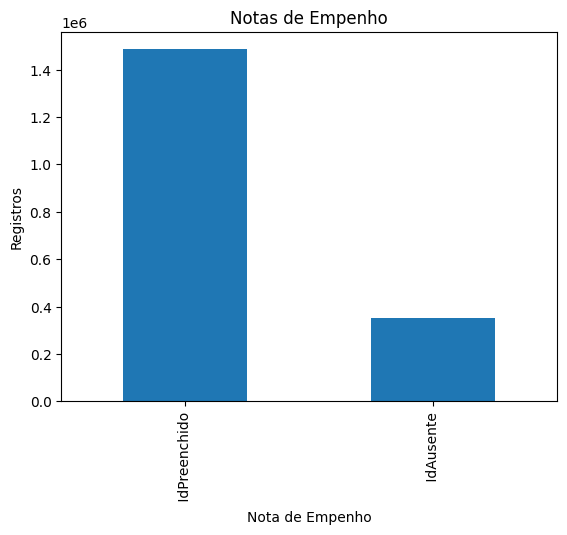

In [ ]:
series = tce3['Analise'].value_counts()
ax = series.plot(kind='bar', title='Notas de Empenho')
ax.set_xlabel('Nota de Empenho')
ax.set_ylabel('Registros')
plt.show()

#### 1.4. Tratando os valores ausentes

In [ ]:
#substituindo todos os valores ausentes por zero
for col in tce3.columns[tce3.dtypes=='Int64']: #restringindo a execução para colunas com números inteiros
    tce3[col] = tce3[col].fillna(value=0) #substituindo valores ausentes por zero
for col in tce3.columns[tce3.dtypes=='string']: #restringindo a execução para colunas com string
    tce3[col] = tce3[col].fillna('0') #substituindo valores ausentes por zero
for col in tce3.columns[tce3.dtypes=='Float64']: #restringindo a execução para colunas com valores
    tce3[col] = tce3[col].fillna(value=0) #substituindo valores ausentes por zero

#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'2.Atualizando tipos': time_new - time_old})

tce3.isnull().sum()

Analise                0
IdEmpenho              0
Ano                    0
Vlr_AnulacaoEmpenho    0
CdFonteTCE             0
CdFonteUG              0
CNPJRaiz               0
CPFCNPJCredorQtNrs     0
CPFCNPJCredor          0
Credor                 0
DtEmpenho              0
DEFonteTCE             0
DEFonteUG              0
DEPrograma             0
DEProjAtiv             0
DtAnomes               0
Elemento               0
ElemDespesaTCE         0
ElemDespesaUG          0
Ente                   0
Esfera                 0
Funcao                 0
Historico              0
IdContrato             0
IdFonte                0
IdFuncao               0
Id_Orgao               0
IdPrograma             0
IdSubFuncao            0
IdUnid                 0
IdOrgao                0
NrFonte                0
NrFonteUG              0
NrLicitacao            0
NrProjAtiv             0
NrEmpenho              0
ProgTrab               0
ProgTrabRed            0
ProjAtiv               0
SubFuncao              0


In [ ]:
#Aplicando melhor tipo para alguns dos campos
tce3['Elemento'] = tce3['Elemento'].astype('Int64')
tce3['IdFonte'] = tce3['IdFonte'].astype('Int64')
tce3['Id_Orgao'] = tce3['Id_Orgao'].astype('Int64')
tce3['IdOrgao'] = tce3['IdOrgao'].astype('Int64')
for col in tce3.columns[tce3.dtypes=='Int64']:
    tce3[col] = tce3[col].astype('string')
tce3.iloc[-1]

Analise                                                     IdPreenchido
IdEmpenho                                    202100581043500010000000002
Ano                                                                 2021
Vlr_AnulacaoEmpenho                                                    0
CdFonteTCE                                                             0
CdFonteUG                                                              2
CNPJRaiz                                                        60746948
CPFCNPJCredorQtNrs                                                    14
CPFCNPJCredor                                             60746948228806
Credor                                                     BRADESCO S.A.
DtEmpenho                                            2021-06-30 00:00:00
DEFonteTCE                                           RECURSOS ORDINÁRIOS
DEFonteUG                                                         FURPGM
DEPrograma                                         

#### 1.5. Formatando e analisando os valores ausentes e outliers

In [ ]:
#corrigindo a formatação das colunas de valores
for col in tce3.filter(like='Vlr').columns: #filtrando/restringindo a execução
    tce3[col] = tce3[col].str.replace(',', '.') #substituindo virgulas por pontos
    tce3[col] = pd.to_numeric(tce3[col], errors='coerce') #convertendo em numérico

#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'3.Tratando tipos e strings ausentes': time_new - time_old})

#exibindo as colunas de valores corrigidos
tce3.filter(like='Vlr')

,Vlr_AnulacaoEmpenho,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
0,90.52,8067.73,0.00,101467.32,91297.14,0.00,0.00,7977.21,0.00,91297.14
1,0.00,7526.16,0.00,0.00,0.00,0.00,0.00,7526.16,0.00,0.00
2,0.00,180.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00
3,0.00,7352.03,0.00,0.00,0.00,0.00,0.00,7352.03,0.00,0.00
4,0.00,7528.10,0.00,0.00,0.00,0.00,0.00,7528.10,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1863226,0.00,1800.00,0.00,1800.00,0.00,0.00,0.00,1800.00,1800.00,0.00
1863227,0.00,1800.00,0.00,1800.00,0.00,0.00,0.00,1800.00,1800.00,0.00
1863228,0.00,1800.00,0.00,1800.00,0.00,0.00,0.00,1800.00,1800.00,0.00
1863229,0.00,99000.00,0.00,28050.47,28050.47,0.00,0.00,99000.00,28050.47,28050.47


In [ ]:
#observando as características para os valores
tce3.filter(like='Vlr').describe(percentiles = [.25, .50, .75, .85, .95])

,Vlr_AnulacaoEmpenho,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
count,1838698.00,1838698.00,1838698.00,1838698.00,1838698.00,1838698.00,1838698.00,1838698.00,1838698.00,1838698.00
mean,27214.95,227263.57,102.36,187321.69,510215.69,37719.88,3328.14,200048.62,69098.16,547935.57
std,1697581.81,4484827.73,11461.47,7953970.90,485750742.52,4101401.09,150404.70,4279703.67,1068052.99,485794125.60
min,-3246192.49,-2950000.00,0.00,-313169.95,-3113062.79,-89008.34,-622754.27,-1218506359.37,-2800000.00,-258428.01
25%,0.00,945.00,0.00,172.81,124.00,0.00,0.00,622.99,0.00,138.00
50%,0.00,4000.00,0.00,1836.00,1671.87,0.00,0.00,3161.57,1046.41,1765.01
75%,0.00,23700.00,0.00,12093.34,11149.21,0.00,0.00,19800.00,7913.88,11802.69
85%,0.00,68348.24,0.00,37591.76,34273.13,147.84,0.00,58175.11,24524.65,36603.54
95%,6260.18,400000.00,0.00,244453.38,216300.00,5796.55,0.00,346961.74,157109.28,236400.30
max,1277460949.02,1577173734.63,6037018.06,2876402349.53,658621122167.30,2653392362.62,63000000.00,1577173734.63,220688626.38,658624450833.86


In [ ]:
#Marcando regitros com valores exorbitantes
for col in tce3.filter(like='Vlr').columns: #filtrando/restringindo a execução
    tce3.loc[tce3[col] > 6000000, 'Analise'] = tce3.Analise + ' VlrOutlier' #preenchendo resultado da análise

#Marcando regitros com valores negativos
for col in tce3.filter(like='Vlr').columns: #filtrando/restringindo a execução
    tce3.loc[tce3[col] < 0, 'Analise'] = tce3.Analise + ' VlrOutlier' #preenchendo resultado da análise

#atualizando as tags em Analise
tce3['Analise'] = tce3['Analise'].str.split(' ').map(set).str.join(' ')  #eliminado palavras repetidas
tce3['Analise'] = tce3['Analise'].apply(lambda x: ' '.join(sorted(x.split()))) #ordenando as palavras
#tce3['Analise'] = [' '.join(sorted(x)) for x in tce3['Analise'].str.split()]

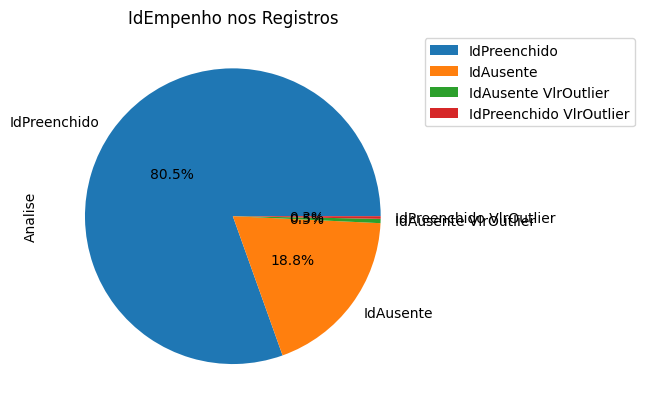

In [ ]:
#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'4.Análise e tratamento de valores': time_new - time_old})

#plotando gráfico para observar tags de Analise
series = tce3['Analise'].value_counts()
ax = series.plot(kind='pie', title='IdEmpenho nos Registros', legend=True, autopct='%1.1f%%', startangle=0, pctdistance=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

#### 1.6. Observando as correspondências no preenchimento dos campos

In [ ]:
#analisando alguns registros constatamos que muitos dos campos são preenchidos mediante concatenação de outros campos do mesmo registro,
#isso viabiliza recuperar parte das informações ausentes, o que pode facilitar alguma análise posterior.
tce4 = tce3[:]

In [ ]:
#tce4.loc[tce4['Id_Orgao'] == '0', Id_Orgao] = tce4.Ano + tce4.IdUnid + tce4.IdOrgao[4:8]
#tce4.loc[tce4['IdEmpenho'] == '0', IdEmpenho] = tce4.Ano + tce4.IdOrgao[4:8] + tce4.IdUnid + tce['IdPrograma'].zfill(4) + tce['NrEmpenho'].zfill(10)
#tce4.loc[tce4['ElemDespesaUG'] == '0', ElemDespesaUG] = tce4.ElemDespesaTCE
#tce4.loc[tce4['ProgTrabRed'] == '0', ProgTrabRed] = tce4.ProgTrab.str.replace('/', ' ').apply(lambda x: x.split(" ")[-3:])

In [ ]:
#O classificador de gastos consta inserido na informação de 2 colunas do dataset: 'Elemento' e 'ProgTrab'
tce5 = tce4[:]
#criando coluna para o classificador obtido em Elemento
tce5['CGElem'] = tce5['Elemento'].str[-8:]                                    #obtendo os últimos 8 dígitos do Elemento
#criando coluna para o classificador obtido em ProgTrab
tce5['CGProgTrab'] = tce5['ProgTrab']                                         #assumindo o ProgTrab
tce5['CGProgTrab'] = tce5.CGProgTrab.str.replace('/', ' ')                    #substituindo as barras por espaço
tce5['CGProgTrab'] = tce5['CGProgTrab'].apply(lambda x: x.split(" ")[-2])     #mantendo somente a penúltima substring

In [ ]:
#analisando CGElem e CGProgTrab
#Preenchendo com zero os valores nulos
for col in tce5.filter(items=['CGElem','CGProgTrab']).columns:                      #restringindo a execução
    tce5[col] = tce5[col].fillna(value='0')                                         #substituindo valores ausentes por zero
    tce5.loc[tce5[col] == '0', 'Analise'] = tce5.Analise + ' NA_CG'                 #preenchendo resultado da análise
    tce5.loc[tce5[col].str.startswith('00'), 'Analise'] = tce5.Analise + ' Sz_CG'   #marcando CG que começaram com zeros
    tce5.loc[tce5[col].str.startswith('00'), col] = tce5[col].str[2:]               #eliminando os zeros do início do CG
    #verificando quantidade de dígitos no Elemento
    tce5.loc[tce5[col].str.len() < 8, 'Analise'] = tce5.Analise + ' Z_CG'           #preenchendo resultado da análise
    tce5.loc[tce5[col].str.len() == 6, col] = tce5[col] + '00'                      #completando com zeros
    tce5.loc[tce5[col].str.len() == 4, col] = tce5[col] + '0000'                    #completando com zeros

In [ ]:
#atualizando a coluna com as tags de preparação do dataset
for col in tce5.filter(items=['Analise']):
    tce5[col] = tce5[col].str.split(' ').map(set).str.join(' ')          #eliminado palavras repetidas
    tce5[col] = tce5[col].apply(lambda x: ' '.join(sorted(x.split())))   #ordenando as palavras

series5 = tce5['Analise'].value_counts()                                 #sumarizando as categorias de tags em Analise
series5

IdPreenchido               1479404
IdAusente                   345358
IdAusente VlrOutlier          8605
IdPreenchido VlrOutlier       5234
IdPreenchido Sz_CG Z_CG         97
Name: Analise, dtype: int64

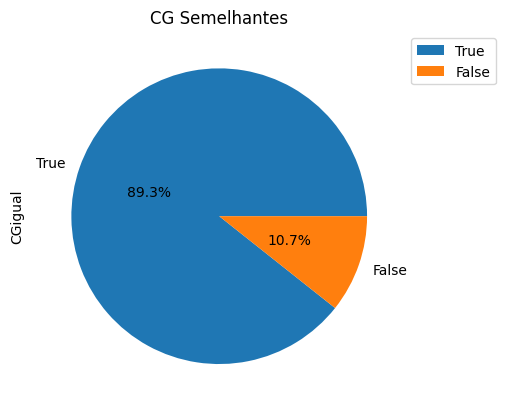

In [ ]:
#verificar se há incompatibilidade entre os códigos extraídos de 'Elemento' e 'ProgTrab'
tce5['CGigual'] = (tce5['CGElem'] == tce5['CGProgTrab'])

#plotando gráfico com 
series = tce5['CGigual'].value_counts()
ax = series.plot(kind='pie', title='CG Semelhantes', legend=True, autopct='%1.1f%%', startangle=0, pctdistance=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:

#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'5.Promovendo preenchimento conforme correspondências': time_new - time_old})


In [ ]:
#conhecendo os registros cujos CGs não coincidem
tce5[(tce5['CGigual'] == False)]

,Analise,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE,CdFonteUG,CNPJRaiz,CPFCNPJCredorQtNrs,CPFCNPJCredor,Credor,...,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago,CGElem,CGProgTrab,CGigual
247930,IdPreenchido,202100200036300060000000368,2021,0.00,0,2,00000000,14,00000000000191,BANCO DO BRASIL SA,...,24120.06,24120.06,0.00,0.00,100000.00,24120.06,24120.06,33904000,33903999,False
247951,IdPreenchido,202100200036300140000001166,2021,0.00,0,2,00085822,14,00085822000112,ESPECIFARMA COM.DE MEDICAMENTOS E PROD.,...,275.52,275.52,0.00,0.00,275.52,275.52,275.52,33909100,33909101,False
247989,IdPreenchido,201800200036300140000000426,2018,37891.24,0,0,00360305,14,00360305000104,CAIXA ECONOMICA FEDERAL,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31901300,31901301,False
248032,IdPreenchido,202100200036300060000000377,2021,0.00,0,2,00360305,14,00360305000104,CAIXA ECONOMICA FEDERAL,...,91921.97,91921.97,0.00,0.00,100000.00,91921.97,91921.97,33904000,33903999,False
248033,IdPreenchido,202100200036300160000000486,2021,0.00,0,2,00360305,14,00360305000104,CAIXA ECONOMICA FEDERAL,...,5359.80,5359.80,0.00,0.00,17000.00,5359.80,5359.80,33904000,33903999,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862804,IdPreenchido,202100071035507120000000016,2021,0.00,15,34,05400781,14,05400781000125,FUNDO DE PREVIDENCIA DO MUNICIPAL DE ITALVA,...,0.00,409205.99,0.00,409205.99,481000.00,409205.99,409205.99,31911304,31911303,False
1862805,IdPreenchido,202100071035507120000000034,2021,0.00,15,34,06083793,14,06083793000136,MERITI PREVI,...,0.00,4020.34,0.00,4020.64,10000.00,4020.64,4020.34,31901400,31901399,False
1862872,IdPreenchido,202100071035507050000000013,2021,0.00,0,30,29979036,14,29979036024830,INSTITUTO NACIONAL DO SEGURO SOCIAL,...,0.00,79930.04,0.00,92510.63,200000.00,92510.63,79930.04,31901304,31901302,False
1862873,IdPreenchido,202100071035507120000000014,2021,0.00,15,34,29979036,14,29979036024830,INSTITUTO NACIONAL DO SEGURO SOCIAL,...,0.00,80000.00,0.00,80000.00,80000.00,80000.00,80000.00,31901304,31901302,False


#### 1.7. Ajustando textos

In [ ]:
#definindo rotinas de tratamento dos texto
def acentoff(texto):
  return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')      #retirar acentuação das palavras

def acentoff2(words):
    wordlist = []
    for word in words.split():
        new = acentoff(word)
        new = re.sub(r'[^\w\a]'," ", new)                                                     #eliminação de caracteres especiais
        if new != "":
            wordlist.append(new.upper())                                                     #tornar maiusculas
    return wordlist
  
def process(words):
    words = acentoff2(words)
    return ' '.join(words)                                                                   #reagrupar palavras tratadas

In [ ]:
#Lista de colunas com texto a ser tratado em tce
tce_col = ['Credor', 'DEFonteTCE', 'DEFonteUG', 'DEPrograma', 'DEProjAtiv', 'ElemDespesaTCE', 'ElemDespesaUG', 'Ente', 'Funcao', 'Historico', 'SubFuncao', 'Tp_Empenho', 'Unidade']
print(tce_col)

['Credor', 'DEFonteTCE', 'DEFonteUG', 'DEPrograma', 'DEProjAtiv', 'ElemDespesaTCE', 'ElemDespesaUG', 'Ente', 'Funcao', 'Historico', 'SubFuncao', 'Tp_Empenho', 'Unidade']


In [ ]:
#tratar textos em TCE
tce_TX = tce5[:]
for col in tce_TX[tce_TX.columns.intersection(tce_col)]:                      #filtrando/restringindo a execução
    tce_TX[col] = tce_TX.apply(lambda row: process(row[col]), axis=1)         #aplicando a rotina de tratamento dos textos para as colunas

In [ ]:
#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'6.Pre-tratamento dos textos do dataset': time_new - time_old})

### 2. Avaliando os registros em função dos classificadores de gastos

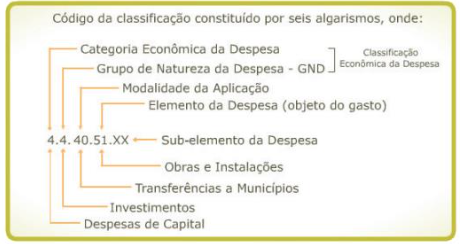

#### 2.1. Obtendo a tabela de códigos com base na classificação de gastos atribuída pelo TCE (ProgTrab)

In [ ]:
#elementos de despesa, fonte: http://www.fazenda.rj.gov.br/sefaz/content/conn/UCMServer/uuid/dDocName%3AWCC201408
excel_data = pd.read_excel('tabCD2018.xlsx')
tabCD2018 = pd.DataFrame(excel_data)

#aplicando melhor tipo automatico
tabCD2018 = tabCD2018.convert_dtypes()

#forçando os inteiros para string
for col in tabCD2018.columns:   #restringindo a execução para colunas com números inteiros
    tabCD2018[col] = tabCD2018[col].fillna('0')            #substituindo ausentes por zero
    tabCD2018[col] = tabCD2018[col].astype('string')       #transformando em strings
    
#tratar textos em tabCD2018
tab_col = ['titulo', 'desc']
for col in tabCD2018[tabCD2018.columns.intersection(tab_col)]:                      #filtrando/restringindo a execução
    tabCD2018[col] = tabCD2018.apply(lambda row: process(row[col]), axis=1)         #aplicando a rotina de tratamento dos textos para as colunas

tabCD2018

,cod,titulo,desc
0,30000000,DESPESAS CORRENTES,CLASSIFICAM SE NESTA CATEGORIA TODAS AS DESPES...
1,31000000,PESSOAL E ENCARGOS SOCIAIS,DESPESAS DE NATUREZA REMUNERATORIA DECORRENTES...
2,31200000,TRANSFERENCIAS A UNIAO,0
3,31300000,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0
4,31400000,TRANSFERENCIAS A MUNICIPIOS,0
...,...,...,...
1389,90000000,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA
1390,99000000,RESERVA DE CONTINGENCIA,0
1391,99990000,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...
1392,99999900,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...


In [ ]:
#obtendo os códigos atribuidos, suas descricoes e quantidades
tceCG = tce_TX.groupby(['CGProgTrab', 'ElemDespesaTCE']).size().reset_index(name='freq')   #sumarizando
tceCG.rename(columns={'CGProgTrab': 'cod', 'ElemDespesaTCE':'tituloTCE'}, inplace=True)    #renomeando colunas
tceCG.sort_values(['cod', 'freq'], ascending=[True, False])                                #ordenando
#forçando os inteiros para string
for col in tceCG.columns[tceCG.dtypes=='int64']:   #restringindo a execução para colunas com números inteiros
    tceCG[col] = tceCG[col].astype('string')       #transformando em strings
for col in tceCG.columns[tceCG.dtypes=='object']:   #restringindo a execução para colunas com números inteiros
    tceCG[col] = tceCG[col].astype('string')       #transformando em strings
print(tceCG.shape[0])
tceCG.groupby(['cod'])['freq'].max()               #agrupando pelo código
tceCG1 = tceCG.groupby(['cod'])['freq'].transform(max) == tceCG['freq']
tceCG2 = tceCG[tceCG1]
tceCG2

1220


,cod,tituloTCE,freq
0,31209600,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,4
1,31309200,DESP DE EXERCICIOS ANTERIORES RELATIVAS A PESS...,7
4,31309600,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,37
5,31409600,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,17
6,31710000,TRANSFERENCIAS A CONSORCIOS PUBLICOS MEDIANTE ...,2
...,...,...,...
1215,46917106,DESPESAS COM AMORTIZACAO DA DIVIDA REALIZADOS ...,22
1216,46917300,DESPESAS COM AMORTIZACAO DA DIVIDA REALIZADOS ...,13
1217,46917700,DESPESAS COM AMORTIZACAO DA DIVIDA REALIZADOS ...,18
1218,46919200,DESPESAS COM AMORTIZACAO DA DIVIDA REALIZADOS ...,57


In [ ]:
#agregando dados de tceCG2 em tabCD2018
tceCD = pd.merge(tabCD2018, tceCG2, how='outer', left_on=['cod'], right_on=['cod']).sort_values('cod')
#atualizando informações
for col in tceCD.filter(items=['titulo','desc', 'tituloTCE', 'freq']).columns:                      #restringindo a execução
    tceCD[col] = tceCD[col].fillna(value='0')                                                       #substituindo valores ausentes com zero
for col in tceCD.filter(items=['titulo', 'desc']).columns:
    tceCD.loc[tceCD[col] == '0', col] = tceCD.tituloTCE
for col in tceCD.filter(items=['tituloTCE']).columns:
    tceCD.loc[tceCD[col] == '0', col] = tceCD.titulo
for col in tceCD.columns[tceCD.dtypes=='object']:   #restringindo a execução para colunas com números inteiros
    tceCD[col] = tceCD[col].astype('string')       #transformando em strings
tceCD

,cod,titulo,desc,tituloTCE,freq
0,30000000,DESPESAS CORRENTES,CLASSIFICAM SE NESTA CATEGORIA TODAS AS DESPES...,DESPESAS CORRENTES,0
1,31000000,PESSOAL E ENCARGOS SOCIAIS,DESPESAS DE NATUREZA REMUNERATORIA DECORRENTES...,PESSOAL E ENCARGOS SOCIAIS,0
2,31200000,TRANSFERENCIAS A UNIAO,0,TRANSFERENCIAS A UNIAO,0
1396,31209600,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,4
3,31300000,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0
...,...,...,...,...,...
1391,90000000,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,0
1392,99000000,RESERVA DE CONTINGENCIA,0,RESERVA DE CONTINGENCIA,0
1393,99990000,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...,RESERVA DE CONTINGENCIA,0
1394,99999900,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...,RESERVA DE CONTINGENCIA,0


In [ ]:
#categorizando os códigos
cd_list = tceCD[:]
cd_list['level'] = ''
cd_list['parent'] = ''
for col in cd_list['cod']:
    cd_list.loc[(cd_list['cod'].str[1:] == '0000000') & (cd_list['cod'].str[0] != '0'), 'level'] = '1 - Categoria'      
    cd_list.loc[(cd_list['cod'].str[1:] == '0000000') & (cd_list['cod'].str[0] != '0'), 'parent'] = cd_list.cod
    cd_list.loc[(cd_list['cod'].str[2:] == '000000') & (cd_list['cod'].str[1] != '0'), 'level'] = '2 - Grupo'
    cd_list.loc[(cd_list['cod'].str[2:] == '000000') & (cd_list['cod'].str[1] != '0'), 'parent'] = cd_list['cod'].str[:1] + '0000000'
    cd_list.loc[(cd_list['cod'].str[4:] == '0000') & (cd_list['cod'].str[2:4] != '00'), 'level'] = '3 - Modalidade'
    cd_list.loc[(cd_list['cod'].str[4:] == '0000') & (cd_list['cod'].str[2:4] != '00'), 'parent'] = cd_list['cod'].str[:2] + '000000'
    cd_list.loc[(cd_list['cod'].str[6:] == '00') & (cd_list['cod'].str[4:6] != '00'), 'level'] = '4 - Elemento'
    cd_list.loc[(cd_list['cod'].str[6:] == '00') & (cd_list['cod'].str[4:6] != '00'), 'parent'] = cd_list['cod'].str[:4] + '0000'
    cd_list.loc[(cd_list['cod'].str[6:] != '00'), 'level'] = 'U - Subelemento'
    cd_list.loc[(cd_list['cod'].str[6:] != '00'), 'parent'] = cd_list['cod'].str[:6] + '00'
cd_list  

,cod,titulo,desc,tituloTCE,freq,level,parent
0,30000000,DESPESAS CORRENTES,CLASSIFICAM SE NESTA CATEGORIA TODAS AS DESPES...,DESPESAS CORRENTES,0,1 - Categoria,30000000
1,31000000,PESSOAL E ENCARGOS SOCIAIS,DESPESAS DE NATUREZA REMUNERATORIA DECORRENTES...,PESSOAL E ENCARGOS SOCIAIS,0,2 - Grupo,30000000
2,31200000,TRANSFERENCIAS A UNIAO,0,TRANSFERENCIAS A UNIAO,0,3 - Modalidade,31000000
1396,31209600,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,4,4 - Elemento,31200000
3,31300000,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0,3 - Modalidade,31000000
...,...,...,...,...,...,...,...
1391,90000000,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,0,1 - Categoria,90000000
1392,99000000,RESERVA DE CONTINGENCIA,0,RESERVA DE CONTINGENCIA,0,2 - Grupo,90000000
1393,99990000,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...,RESERVA DE CONTINGENCIA,0,3 - Modalidade,99000000
1394,99999900,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...,RESERVA DE CONTINGENCIA,0,4 - Elemento,99990000


In [ ]:
#exibindo o root
cd_list['root'] = ''
for col in cd_list.columns:
    cd_list.loc[cd_list['level'].str[0] == '1', 'root'] = 'root'
    cd_list.loc[cd_list['level'].str[0] == '2', 'root'] = cd_list['cod'].str[0]
    cd_list.loc[cd_list['level'].str[0] == '3', 'root'] = cd_list['cod'].str[1]
    cd_list.loc[cd_list['level'].str[0] == '4', 'root'] = cd_list['cod'].str[2:4]
    cd_list.loc[cd_list['level'].str[0] == 'U', 'root'] = cd_list['cod'].str[4:6]
cd_list   

,cod,titulo,desc,tituloTCE,freq,level,parent,root
0,30000000,DESPESAS CORRENTES,CLASSIFICAM SE NESTA CATEGORIA TODAS AS DESPES...,DESPESAS CORRENTES,0,1 - Categoria,30000000,root
1,31000000,PESSOAL E ENCARGOS SOCIAIS,DESPESAS DE NATUREZA REMUNERATORIA DECORRENTES...,PESSOAL E ENCARGOS SOCIAIS,0,2 - Grupo,30000000,3
2,31200000,TRANSFERENCIAS A UNIAO,0,TRANSFERENCIAS A UNIAO,0,3 - Modalidade,31000000,1
1396,31209600,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,4,4 - Elemento,31200000,20
3,31300000,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0,3 - Modalidade,31000000,1
...,...,...,...,...,...,...,...,...
1391,90000000,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,0,1 - Categoria,90000000,root
1392,99000000,RESERVA DE CONTINGENCIA,0,RESERVA DE CONTINGENCIA,0,2 - Grupo,90000000,9
1393,99990000,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...,RESERVA DE CONTINGENCIA,0,3 - Modalidade,99000000,9
1394,99999900,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...,RESERVA DE CONTINGENCIA,0,4 - Elemento,99990000,99


In [ ]:
CGlevelND = cd_list['level'].value_counts()
CGlevelND

U - Subelemento    1397
4 - Elemento        297
3 - Modalidade       70
2 - Grupo             7
1 - Categoria         3
Name: level, dtype: int64

In [ ]:
#Criando dataset para conhecer os nós
cg_family = cd_list[['parent','cod', 'level']]
#eliminando as arestas circulares
cg_family = cg_family.loc[cg_family['parent'] != cg_family['cod']]

#substituindo Posição pela cor que o grupo deve receber
cg_family["level"] = cg_family["level"].replace("1 - Categoria", "black")
cg_family["level"] = cg_family["level"].replace("2 - Grupo", "green")
cg_family["level"] = cg_family["level"].replace("3 - Modalidade", "orange")
cg_family["level"] = cg_family["level"].replace("4 - Elemento", "blue")
cg_family["level"] = cg_family["level"].replace("U - Subelemento", "red")
#atualizando nome das colunas
cg_family.rename(columns={'level':'color', 'parent':'from', 'cod':'to'}, inplace=True)
cg_family

,from,to,color
1,30000000,31000000,green
2,31000000,31200000,orange
1396,31200000,31209600,blue
3,31000000,31300000,orange
1397,31300000,31309200,blue
...,...,...,...
1390,46919300,46919301,red
1392,90000000,99000000,green
1393,99000000,99990000,orange
1394,99990000,99999900,blue


In [ ]:
#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'7.Carga e análise dos Classificadores de Gastos/Despesas': time_new - time_old})

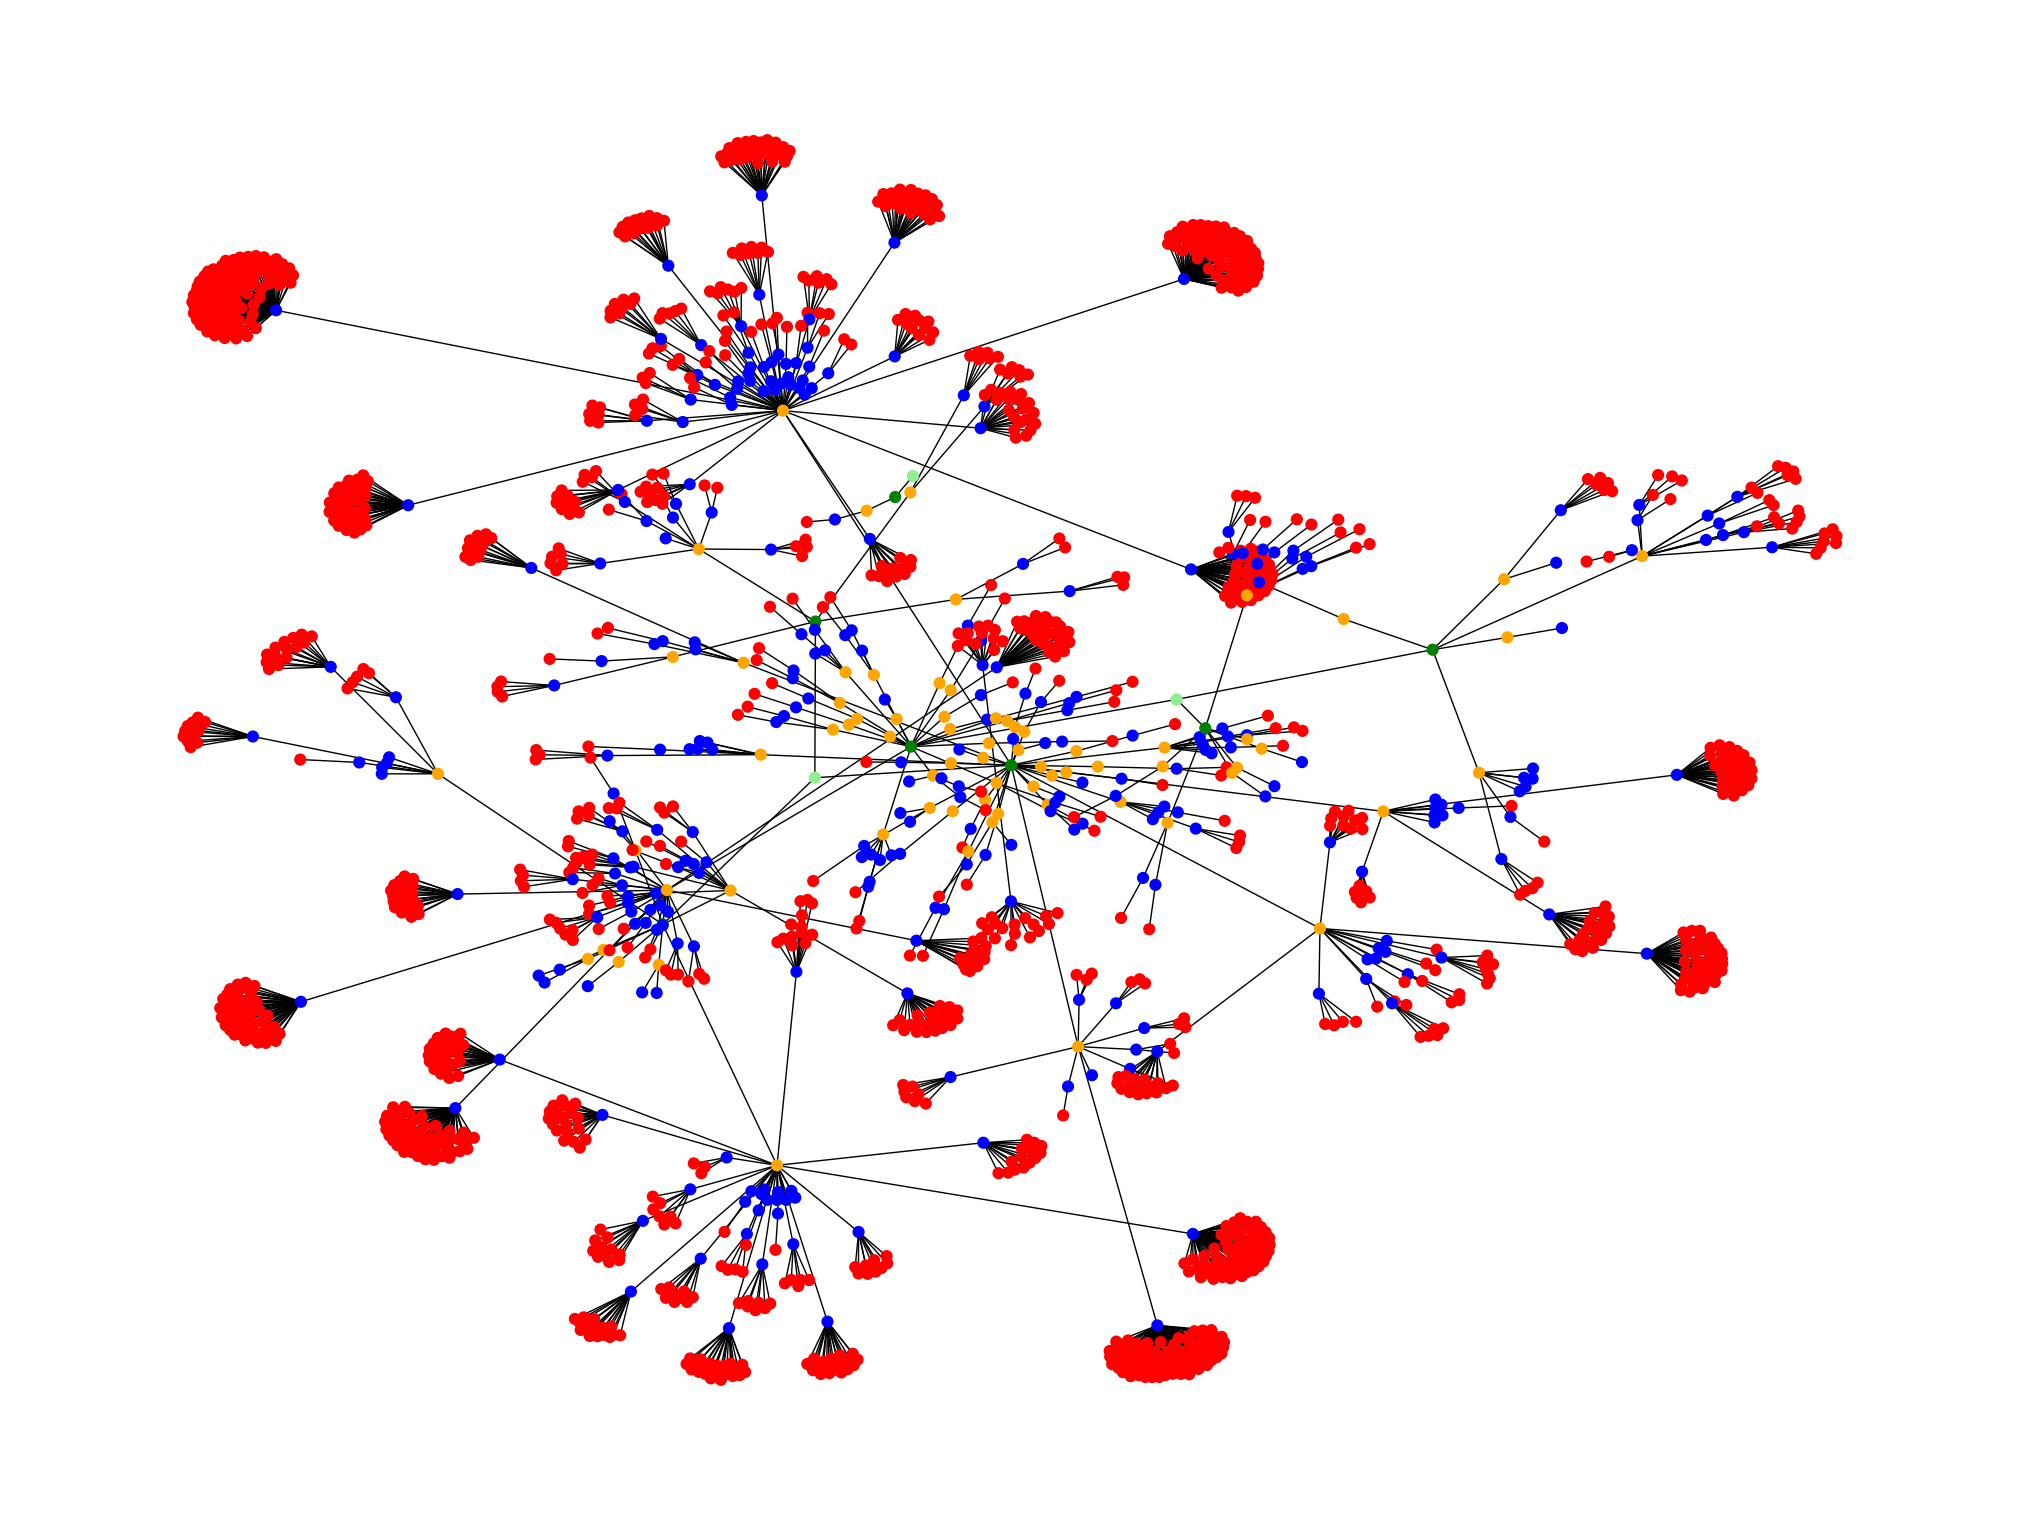

In [ ]:
G = nx.from_pandas_edgelist(cg_family, 'from', 'to')

for x in cg_family[['to','color']].to_numpy().tolist():
    d.update({x[0]: x[1]})

nodes = G.nodes()
plt.figure(figsize=(20,15)) 
pos = nx.draw(G, with_labels=False, 
              nodelist=nodes,
              node_color=[d.get(i,'lightgreen') for i in nodes], 
              node_size=60)


#### 2.2. Recuperando a classificação do gasto baseado no Elemento

In [ ]:
#merge de tce5 e LCDP em função do Elemento
tce_elem = pd.merge(tce_TX, cd_list, how='left', left_on=['CGElem'], right_on=['cod'])
tce_elem.rename(columns={'CodND': 'CodND_Elem', 'tituloTCE':'Desc_Elem', 'level':'Level_Elem', 'parent':'Pai_Elem'}, inplace=True)
for col in tce_elem.columns[tce_elem.dtypes=='object']:   #restringindo a execução para colunas com números inteiros
    tce_elem[col] = tce_elem[col].astype('string')       #transformando em strings
tce_elem[tce_elem.isna().any(axis=1)]

,Analise,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE,CdFonteUG,CNPJRaiz,CPFCNPJCredorQtNrs,CPFCNPJCredor,Credor,...,CGElem,CGProgTrab,CGigual,cod,titulo,desc,Desc_Elem,freq,Level_Elem,Pai_Elem
765307,IdPreenchido,201800020065716000000001810,2018,0.00,99,8,01646602,11,01646602757,JULES JOSE DA FONSECA,...,33914000,33913999,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
765308,IdPreenchido,201800020065716000000001816,2018,0.00,99,8,01646602,11,01646602757,JULES JOSE DA FONSECA,...,33914000,33913999,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
765502,IdPreenchido,201800020065716000000001808,2018,0.00,99,8,02357914,11,02357914742,SEBASTIANA LUCIA SOUZA ALMEIDA RODRIGUES,...,33914000,33913999,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
765503,IdPreenchido,201800020065716000000001814,2018,0.00,99,8,02357914,11,02357914742,SEBASTIANA LUCIA SOUZA ALMEIDA RODRIGUES,...,33914000,33913999,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
766385,IdPreenchido,201900020065717000000001535,2019,164.45,77,51,04392667,11,04392667774,WILLIAMS MARTINS BARROS,...,33914000,33913999,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772004,IdPreenchido,201800020065716000000001811,2018,0.00,99,8,70071640,11,70071640720,CARLOS ALBERTO SOUZA MARTINS,...,33914000,33913999,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
772158,IdPreenchido,202100020065717000000000256,2021,0.00,99,26,90180605,14,90180605000102,GENTE SEGURADORA S A,...,33914000,33913999,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1837132,IdPreenchido,202000091029624010000000726,2020,0.00,0,1,15276513,14,15276513000105,FUNDO PREVIDENCIARIO CAPITALIZADO FPC,...,33914000,33913999,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1837816,IdPreenchido,202000091029624010000000474,2020,0.00,0,1,39844436,14,39844436000100,INSTITUTO DE PREV DOS SERV SAO PEDRO DA ALDEIA,...,33914000,33913999,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
#resumo por nível de código
levelElem = tce_elem['Level_Elem'].value_counts()
levelElem

4 - Elemento       1721557
U - Subelemento     117058
3 - Modalidade          29
Name: Level_Elem, dtype: Int64

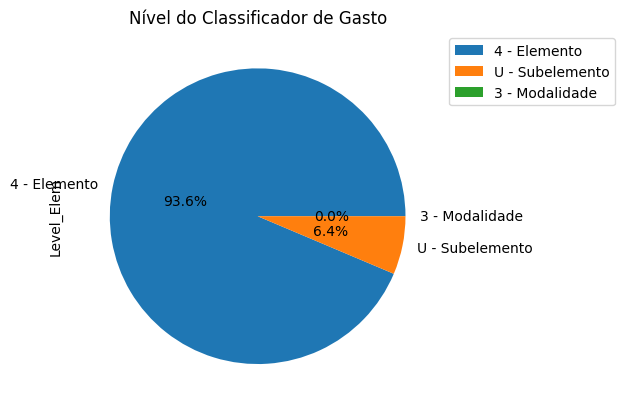

In [ ]:
#gráfico levelND
ax = levelElem.plot(kind='pie', title='Nível do Classificador de Gasto', legend=True, autopct='%1.1f%%', startangle=0, pctdistance=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:
#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'8.Obtendo o CG com base no Elemento': time_new - time_old})

#### 2.3. Recuperando a classificação do gasto baseado no ProgTrab

In [ ]:
#merge de tce5 e LCDP em função do ProgTrab
tce_ND = pd.merge(tce_elem, cd_list, how='left', left_on=['CGProgTrab'], right_on=['cod'])
tce_ND.rename(columns={'CGProgTrab': 'CodND_PT', 'tituloTCE':'Desc_PT', 'level':'Level_PT', 'parent':'Pai_PT'}, inplace=True)
for col in tce_ND.columns[tce_ND.dtypes=='object']:   #restringindo a execução para colunas com números inteiros
    tce_ND[col] = tce_ND[col].astype('string')       #transformando em strings
tce_ND[tce_ND.isna().any(axis=1)]

,Analise,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE,CdFonteUG,CNPJRaiz,CPFCNPJCredorQtNrs,CPFCNPJCredor,Credor,...,freq_x,Level_Elem,Pai_Elem,cod_y,titulo_y,desc_y,Desc_PT,freq_y,Level_PT,Pai_PT
765422,IdPreenchido,201800020065716000000001810,2018,0.00,99,8,01646602,11,01646602757,JULES JOSE DA FONSECA,...,<NA>,<NA>,<NA>,33913999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,61,U - Subelemento,33913900
765423,IdPreenchido,201800020065716000000001816,2018,0.00,99,8,01646602,11,01646602757,JULES JOSE DA FONSECA,...,<NA>,<NA>,<NA>,33913999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,61,U - Subelemento,33913900
765617,IdPreenchido,201800020065716000000001808,2018,0.00,99,8,02357914,11,02357914742,SEBASTIANA LUCIA SOUZA ALMEIDA RODRIGUES,...,<NA>,<NA>,<NA>,33913999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,61,U - Subelemento,33913900
765618,IdPreenchido,201800020065716000000001814,2018,0.00,99,8,02357914,11,02357914742,SEBASTIANA LUCIA SOUZA ALMEIDA RODRIGUES,...,<NA>,<NA>,<NA>,33913999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,61,U - Subelemento,33913900
766500,IdPreenchido,201900020065717000000001535,2019,164.45,77,51,04392667,11,04392667774,WILLIAMS MARTINS BARROS,...,<NA>,<NA>,<NA>,33913999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,61,U - Subelemento,33913900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772119,IdPreenchido,201800020065716000000001811,2018,0.00,99,8,70071640,11,70071640720,CARLOS ALBERTO SOUZA MARTINS,...,<NA>,<NA>,<NA>,33913999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,61,U - Subelemento,33913900
772273,IdPreenchido,202100020065717000000000256,2021,0.00,99,26,90180605,14,90180605000102,GENTE SEGURADORA S A,...,<NA>,<NA>,<NA>,33913999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,61,U - Subelemento,33913900
1837308,IdPreenchido,202000091029624010000000726,2020,0.00,0,1,15276513,14,15276513000105,FUNDO PREVIDENCIARIO CAPITALIZADO FPC,...,<NA>,<NA>,<NA>,33913999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,61,U - Subelemento,33913900
1837992,IdPreenchido,202000091029624010000000474,2020,0.00,0,1,39844436,14,39844436000100,INSTITUTO DE PREV DOS SERV SAO PEDRO DA ALDEIA,...,<NA>,<NA>,<NA>,33913999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,61,U - Subelemento,33913900


In [ ]:
#resumo por nível de código
levelProgTrab = tce_ND['Level_PT'].value_counts()
levelProgTrab

4 - Elemento       1628906
U - Subelemento     209946
3 - Modalidade          29
Name: Level_PT, dtype: Int64

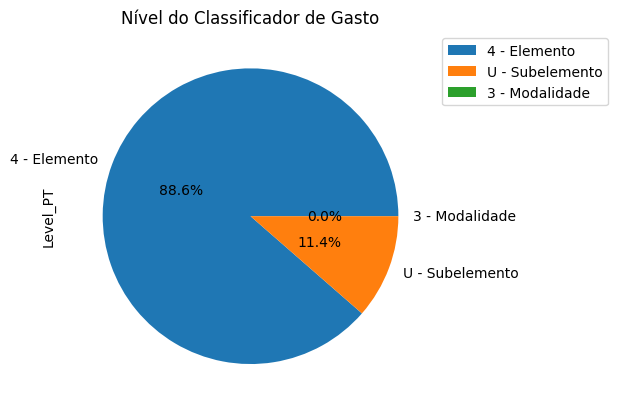

In [ ]:
#gráfico levelND
ax = levelProgTrab.plot(kind='pie', title='Nível do Classificador de Gasto', legend=True, autopct='%1.1f%%', startangle=0, pctdistance=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:
#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'9.Obtendo o CG com base no Programa de Trabalho': time_new - time_old})

#### 2.4. Definindo o CG com nível mais baixo quando houver divergência

In [ ]:
#Considerando que os CGs de ProgTrab estão em maior número em últimos níveis que Elemento,\
    # assumiremos o CG de ProgTrab como válido e trataremos eventuais casos que venham a divergir dessa regra.

#Assumindo Classificador único oriundo de ProgTrab
tce_ND['CG'] = tce_ND.CodND_PT
tce_ND['CGDesc'] = tce_ND.Desc_PT
tce_ND['CGlevel'] = tce_ND.Level_PT
tce_ND['CGpai'] = tce_ND.Pai_PT

In [ ]:
#definindo o nome do índice
tce_ND.index.name="index"

#removendo colunas já desnecessárias
tce_ND.drop(['Desc_Elem', 'Level_Elem', 'Pai_Elem', 'Desc_PT', 'Level_PT', 'Pai_PT',
    'cod_x', 'titulo_x', 'desc_x', 'freq_x', 'cod_y', 'titulo_y', 'desc_y', 'freq_y'], axis=1, inplace=True)

for col in tce_ND:
    tce_ND.loc[tce_ND['CGlevel'].str[0] == "U", 'Analise'] = tce_ND.Analise + ' CGUN'             #marcando itens cujo CG está em último nível

#Atualizando tags em Analise
tce_ND['Analise'] = tce_ND['Analise'].str.split(' ').map(set).str.join(' ')               #eliminado palavras repetidas
tce_ND['Analise'] = tce_ND['Analise'].apply(lambda x: ' '.join(sorted(x.split())))        #ordenando as palavras

series_ND = tce_ND['Analise'].value_counts()
series_ND

IdPreenchido                    1270414
IdAusente                        345358
CGUN IdPreenchido                209173
IdAusente VlrOutlier               8605
IdPreenchido VlrOutlier            4461
CGUN IdPreenchido VlrOutlier        773
IdPreenchido Sz_CG Z_CG              97
Name: Analise, dtype: int64

In [ ]:
#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'10.Assumindo o CG em menor nível': time_new - time_old})

#### 2.5. Preparando o dataset para ML

In [ ]:
#CGs em último nível e sem valores outliers
tce_CGUN = tce_fit[(tce_fit['Analise'].str.contains("CGUN")) & (~tce_fit['Analise'].str.contains("VlrOutlier"))]
#Aplicando melhor tipo para alguns dos campos
int64 = ['Ano', 'CdFonteTCE', 'IdPrograma', 'IdSubFuncao', 'IdUnid', 'IdOrgao', 'NrFonte', 'CG']
for col in int64:
    tce_CGUN[col] = tce_CGUN[col].astype('Int64')

#função para eliminar item da primeira lista e que constam na segunda lista
def Diff(li1, li2):
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2]
    return li_dif

#verificando as colunas de valores
vlr_col = tce_CGUN.filter(like='Vlr').columns.to_list()

string = Diff(tce_CGUN.columns.to_list(), int64)
string = Diff(string, vlr_col)
for col in string:
    tce_CGUN[col] = tce_CGUN[col].astype('string')

In [ ]:
#atributos que repetem informações, não agregam ou fragilizam o treinamento
del_cols = ['IdEmpenho', 'CdFonteUG', 'DEFonteUG', 'DEProjAtiv', 'ElemDespesaUG', 'Id_Orgao', 'NrFonteUG', 'NrLicitacao', \
    'NrProjAtiv', 'ProgTrabRed', 'CGElem', 'CodND_PT', 'CGigual', 'CGDesc', 'CGlevel', 'CGpai', 'Ente', 'ProgTrab', \
        'CNPJRaiz', 'CPFCNPJCredorQtNrs', 'DtEmpenho', 'DtAnomes', 'Elemento', 'IdFonte', 'IdFuncao', 'NrEmpenho', 'ProjAtiv']

#verificando se há colunas no Dataset cujas classes não agregam ao aprendizado
many_class = pd.DataFrame(columns=['atribute', 'qtClasses', 'classes', 'eliminada'])
unique_class = []
max_class = []
for col in tce_CGUN.columns:  #percorrendo cada coluna
    qtClasses = len(tce_CGUN[col].value_counts().keys())
    classes = tce_CGUN[col].value_counts()[0:9].to_dict()
    if qtClasses < 2:
        unique_class.append(col)  #listando atributos que possuem única classe
    if qtClasses > 10:
        others = tce_CGUN[col].shape[0] - sum(classes.values())
        classes.update({'Demais':others})
    if qtClasses / tce_CGUN.shape[0] > 0.95:
        max_class.append(col)
    
    dictc = {'atribute': col, 'qtClasses': qtClasses, 'classes': classes, 'eliminada': ''}
    many_class = many_class.append(dictc, ignore_index=True, sort=False)

print('ATENÇÃO!')
print(len(unique_class), 'colunas do Dataset possuiam única classe:', unique_class)
print(len(max_class), 'colunas do Dataset possuiam granularidade superior a 95%:', max_class)
print(len(del_cols), 'colunas do Dataset não agregam ou fragilizam o aprendizado:')
print('----> ',', '.join(del_cols))
print(len(vlr_col), 'colunas do Dataset se referem a valor:')
print('----> ',', '.join(vlr_col))

In [ ]:
#eliminando colunas unique_class
for col in unique_class:
    if col not in del_cols:
        del_cols.append(col)
    
#eliminando colunas max_class
for col in max_class:
    if col not in del_cols:
        del_cols.append(col)
    
#eliminando colunas de valores
for col in vlr_col: #filtrando/restringindo a execução
    if col not in del_cols:
        del_cols.append(col)

#eliminando informações que não agregam ou fragilizam o treinamento
for col in del_cols:
    tce_CGUN.drop(col, axis=1, inplace=True)

#atualizando many_class
for col in many_class.columns:
    many_class.loc[many_class['atribute'].isin(del_cols), 'eliminada'] = True
    many_class.loc[~many_class['atribute'].isin(del_cols), 'eliminada'] = False

print('As', len(del_cols), 'colunas listadas acima foram retiradas do Dataset, sendo mantidas', len(tce_CGUN.columns.tolist()), 'colunas multiclasse.')
many_class

In [ ]:
#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'11.Dataset para ML': time_new - time_old})

### 3. Gerando relatório analítico

In [ ]:
#ProfileReport para o Dataset completo
tce_report = ProfileReport(tce_ND, minimal=True)
#profile_tce = ProfileReport(tce_report, minimal=True)
tce_report.to_file("tce_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#ProfileReport para o Dataset para ML
tce_report_ML = ProfileReport(tce_CGUN, minimal=True)
#profile_tce = ProfileReport(tce_report, minimal=True)
tce_report_ML.to_file("tce_CGUN.html")

In [ ]:
#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'12.Gerando Profile Reports': time_new - time_old})

### 4. Criando subsets para próximas etapas

In [ ]:
#Documentos com Código de Gastos em Último Nível
tce_fit = tce_ND[(~tce_ND['Analise'].str.contains("IdAusente"))] #desconsiderar registros ausentes
print("tce_fit:", tce_fit.shape[0])
tce_CGigual = tce_fit[(tce_fit['CGigual'] == True)] #considerar somente registros com CGigual
print("tce_CGigual:", tce_CGigual.shape[0])
print("tce_ML:", tce_CGUN.shape[0])

tce_fit: 1484918
tce_CGigual: 1288576
tce_CGUN: 209173


In [ ]:
compression_fit = {'method':'zip', 'archive_name': 'tce_fit.csv'}
tce_fit.to_csv('tce_fit.csv', sep=';', encoding='utf-8-sig', compression=compression_fit)

In [ ]:
#Gerando arquivos para os datasets
null_class.to_csv('null_class.csv', sep=';', encoding='utf-8-sig', index=False)
cd_list.to_csv('cd_list.csv', sep=';', encoding='utf-8-sig', index=False)
tce_CGUN.to_csv('tce_ML.csv', sep=';', encoding='utf-8-sig')
compression_fit = {'method':'zip', 'archive_name':'tce_fit.csv'}
tce_fit.to_csv('tce_fit.csv', sep=';', encoding='utf-8-sig', compression=compression_fit)
compression_ND = {'method':'zip', 'archive_name':'tce_ND.csv'}
tce_ND.to_csv('tce_ND.zip', sep=';', encoding='utf-8-sig', compression=compression_ND)

In [ ]:
#CNPJs a pesquisas CNAE, contratos e CPFs envolvidos
CNPJ = tce_ND.groupby(['CPFCNPJCredor', 'CNPJRaiz', 'Credor']).size().reset_index(name='freq')   #sumarizando
CNPJ = CNPJ[(CNPJ['CPFCNPJCredor'].str.len() == 14) & (CNPJ['CPFCNPJCredor'].str[2:8] != '000000')]
#forçando os inteiros para string
for col in CNPJ.columns[CNPJ.dtypes=='int64']:   #restringindo a execução para colunas com números inteiros
    CNPJ[col] = CNPJ[col].astype('string')       #transformando em strings
for col in CNPJ.columns[CNPJ.dtypes=='object']:   #restringindo a execução para colunas com números inteiros
    CNPJ[col] = CNPJ[col].astype('string')       #transformando em strings
print(CNPJ.shape[0])
CNPJ.to_csv('CNPJs.csv', sep=';', encoding='utf-8-sig')
CNPJ

43227


,CPFCNPJCredor,CNPJRaiz,Credor,freq
111,00000001000136,00000001,INSS INSTITUTO NACIONAL SEG,434
112,00000028000129,00000028,TARGET ENGENHARIA E CONSULTORIA LTDA,3
116,00000086700723,00000086,STELINA RODOLFO,2
120,00000274226740,00000274,ADENISIA DE F COUTO E OUTROS,3
122,00000424000156,00000424,DEBRITO PROPAGANDA LTDA,180
...,...,...,...,...
164145,97554309000165,97554309,JACQUELINE MARTINS DA CONCEICAO 0801859,1
164281,97799915000140,97799915,FUNDO DOS SERVIDORES PUBLICOS DO MUN DE SJUBA,3
164285,97857902000180,97857902,DIVERSOS CREDORES PESSOAL SMCT,13
164996,99316963000166,99316963,LIMA E FAVER SERVICOS MEDICOS LTDA,1


In [ ]:
#Contratos e respectivos CNPJs envolvidos
contratos = tce_ND.groupby(['IdContrato', 'CPFCNPJCredor', 'NrLicitacao', 'CNPJRaiz', 'Credor', 'Ente']).size().reset_index(name='freq')   #sumarizando
contratos = contratos[(contratos['IdContrato'] != '0') & (contratos['CPFCNPJCredor'].str.len() == 14) & (contratos['CPFCNPJCredor'].str[2:8] != '000000')]
for col in contratos.columns[contratos.dtypes=='int64']:                                    
    contratos[col] = contratos[col].astype('string') 
for col in contratos.columns[contratos.dtypes=='object']:                                    
    contratos[col] = contratos[col].astype('string')
print(contratos.shape[0])
contratos.to_csv('contratos.csv', sep=';', encoding='utf-8-sig')
contratos

55663


,IdContrato,CPFCNPJCredor,NrLicitacao,CNPJRaiz,Credor,Ente,freq
242864,000363001/2018,34028316000103,0,34028316,AGENCIA DE CORREIOS COMUNITARI,ANGRA DOS REIS,4
242865,000363001/2019,18024102000102,0,18024102,YURI REGINA NAGAYAMA 25188249871,ANGRA DOS REIS,1
242866,000363001/2020/SESP,15119995000181,0,15119995,XAVIER RESTAURANTE PIZZARIA LTDA ME,ANGRA DOS REIS,1
242867,000363002/2019,31643851000267,2018016038,31643851,VALLE SUL CONSTRUTORA E MINERADORA LTDA,ANGRA DOS REIS,2
242868,000363003/2015,09077888000216,20782/2013,09077888,LIBANO SERV DE LIMPEZA URBANA CONST CIVIL LTDA,ANGRA DOS REIS,7
...,...,...,...,...,...,...,...
313670,010327FMPHCA 040/2020,27482420000108,0,27482420,KAMILLA CATARINA SICILIANO VARGAS,CASIMIRO DE ABREU,1
313671,010327FMPHCA 041/2020,21497954000121,0,21497954,MAXWEL SOARES MEDEIROS DA SILVA,CASIMIRO DE ABREU,1
313674,010355001/2021,03560097000185,0,03560097,PORTALGOV SOLUCOES TECNOGICAS EIRELI,ITALVA,1
313676,010355002/2021,30170134000111,0,30170134,WANDERSON MENDES AZEVEDO,ITALVA,1


In [ ]:
#computando o tempo
time_old = time_new
time_new = time.time()
timeline.append({'13.Geração de subsets para ML': time_new - time_old})
timeline

[{'1.Carga do dataset': 287.04437589645386},
 {'2.Atualizando tipos': 428.69829535484314},
 {'3.Tratando tipos e strings ausentes': 148.93219375610352},
 {'4.Análise e tratamento de valores': 37.673006534576416},
 {'5.Promovendo preenchimento conforme correspondências': 60.7081458568573},
 {'6.Pre-tratamento dos textos do dataset': 1582.573457479477},
 {'7.Carga e análise dos Classificadores de Gastos/Despesas': 182.72803235054016},
 {'7.Carga e análise dos Classificadores de Gastos/Despesas': 1323.4498674869537},
 {'8.Obtendo o CG com base no Elemento': 6553.235206604004},
 {'9.Obtendo o CG com base no Programa de Trabalho': 36.12454295158386},
 {'10.Assumindo o CG em menor nível': 224.73134183883667},
 {'11.Gerando Profile Reports': 288.39681458473206},
 {'12.Geração de subsets para ML': 1493.6344347000122}]